# Pymaceuticals Inc.
---

### Analysis
 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os

In [70]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# mouse_metadata.head()

# Combine the data into a single DataFrame
mouse_data_study_merged = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# # Display the data table for preview
mouse_data_study_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [35]:
# Checking the number of mice.
mouse_count = mouse_data_study_merged["Mouse ID"].count()

print("Number of mice:", (mouse_count))

Number of mice: 1893


In [36]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
ID_Timepoint_duplicates = mouse_data_study_merged.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
ID_Timepoint_duplicates.head()


0    False
1    False
2    False
3    False
4    False
dtype: bool

In [37]:
# Optional: Get all the data for the duplicate mouse ID.
ID_duplicates = mouse_data_study_merged.duplicated(subset=["Mouse ID"], keep=False)

mouse_data_study_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_study_merged.drop_duplicates(subset=["Mouse ID"], inplace=True)
mouse_data_study_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [39]:
# Checking the number of mice in the clean DataFrame.
cleaned_df_mouse_count = mouse_data_study_merged["Mouse ID"].count()

print("Number of mice:", (cleaned_df_mouse_count))

Number of mice: 249


## Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = mouse_data_study_merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    'mean',
    'median',
    'var',
    'std',
    lambda x: x.std() / np.sqrt(x.count())
])

summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Standard Deviation', 'Tumor Volume SEM']

summary_stats_df = summary_stats.reset_index()

summary_stats_df


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Standard Deviation,Tumor Volume SEM
0,Capomulin,45.0,45.0,0.0,0.0,0.0
1,Ceftamin,45.0,45.0,0.0,0.0,0.0
2,Infubinol,45.0,45.0,0.0,0.0,0.0
3,Ketapril,45.0,45.0,0.0,0.0,0.0
4,Naftisol,45.0,45.0,0.0,0.0,0.0
5,Placebo,45.0,45.0,0.0,0.0,0.0
6,Propriva,45.0,45.0,0.0,0.0,0.0
7,Ramicane,45.0,45.0,0.0,0.0,0.0
8,Stelasyn,45.0,45.0,0.0,0.0,0.0
9,Zoniferol,45.0,45.0,0.0,0.0,0.0


In [65]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = mouse_data_study_merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    ('Mean Tumor Volume', 'mean'),
    ('Median Tumor Volume', 'median'),
    ('Tumor Volume Variance', 'var'),
    ('Standard Deviation', 'std'),
    ('Tumor Volume SEM', lambda x: x.std() / np.sqrt(x.count()))
]).reset_index()

summary_stats_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Standard Deviation,Tumor Volume SEM
0,Capomulin,45.0,45.0,0.0,0.0,0.0
1,Ceftamin,45.0,45.0,0.0,0.0,0.0
2,Infubinol,45.0,45.0,0.0,0.0,0.0
3,Ketapril,45.0,45.0,0.0,0.0,0.0
4,Naftisol,45.0,45.0,0.0,0.0,0.0
5,Placebo,45.0,45.0,0.0,0.0,0.0
6,Propriva,45.0,45.0,0.0,0.0,0.0
7,Ramicane,45.0,45.0,0.0,0.0,0.0
8,Stelasyn,45.0,45.0,0.0,0.0,0.0
9,Zoniferol,45.0,45.0,0.0,0.0,0.0


## Bar and Pie Charts

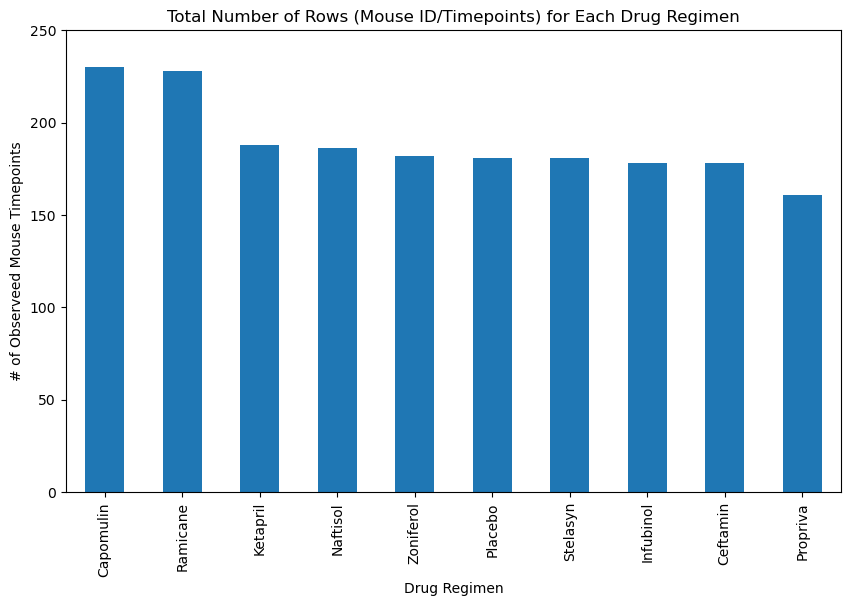

In [72]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of rows for each drug regimen
drug_regimen_counts = mouse_data_study_merged['Drug Regimen'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
drug_regimen_counts.plot(kind='bar')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observeed Mouse Timepoints')
plt.ylim(0, 250)
plt.show()

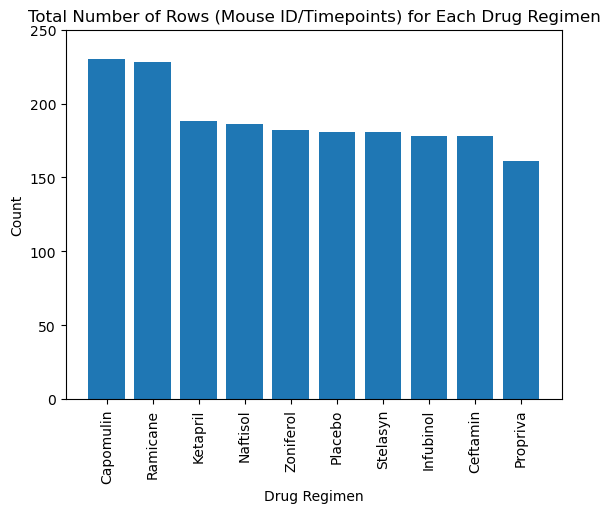

In [71]:
# Count the number of rows for each drug regimen
drug_regimen_counts = mouse_data_study_merged['Drug Regimen'].value_counts()

# Create a bar plot
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.ylim(0, 250)
plt.show()

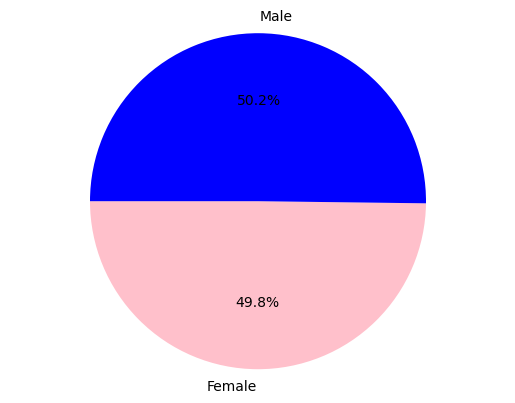

In [88]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_with_gender = mouse_data_study_merged[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique female and male mice
female_mice_count = len(unique_mice_with_gender[unique_mice_with_gender['Sex'] == 'Female'])
male_mice_count = len(unique_mice_with_gender[unique_mice_with_gender['Sex'] == 'Male'])

# Make the pie chart
plt.pie([female_mice_count, male_mice_count], labels=['Female', 'Male'], colors=['pink', 'blue'],
         autopct="%1.1f%%", startangle=180)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
folder_path = "Project Images"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

plt.savefig(os.path.join(folder_path, "Gender_distribution.png"))
plt.show()

## Quartiles, Outliers and Boxplots

In [105]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_data_study_merged.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, mouse_data_study_merged, on=["Mouse ID", "Timepoint"], how="left")

#Show the final tumor volume
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [107]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    #Calculate the IQR
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

    #Print the results
    print(f"{treatment} potential outliers: {outliers}")  

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


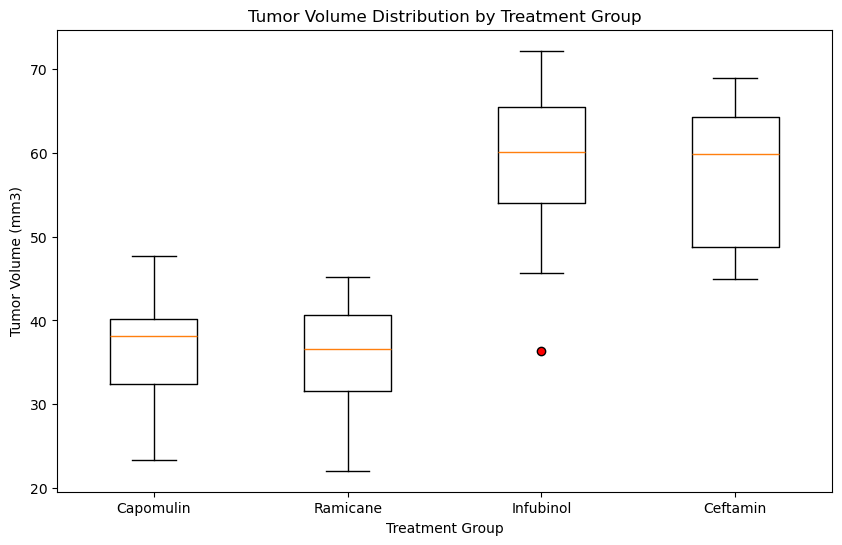

In [111]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
bp = plt.boxplot([final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] 
             for treatment in treatments], 
             labels=treatments)

for flier in bp['fliers']:
    flier.set(markerfacecolor='red', marker='o')

plt.title("Tumor Volume Distribution by Treatment Group")
plt.xlabel("Treatment Group")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

In [117]:
mouse = mouse_data_study_merged.loc[mouse_data_study_merged["Mouse ID"] == "s185"]


plt.plot(mouse['Timepoint'], mouse["Tumor Volume (mm3)"], markers="o", color="b")

plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.hlines(0, 0, 'xmax=50', alpha=0.2)
plt.xlim(0, 50)
plt.ylim(40, 48)

# Show the line chart
plt.show()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


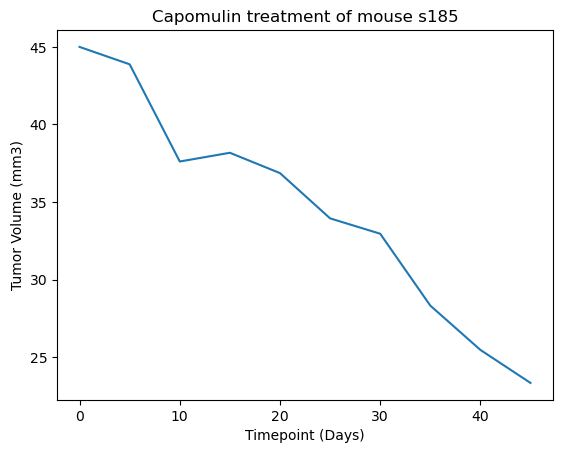

In [121]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select a mouse treated with Capomulin
mouse = mouse_data_study_merged.loc[mouse_data_study_merged["Mouse ID"] == "s185"]

# Plot the line chart
plt.plot(mouse['Timepoint'], mouse["Tumor Volume (mm3)"])

# Set tile and labels of chart
plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Show line chart
plt.show()


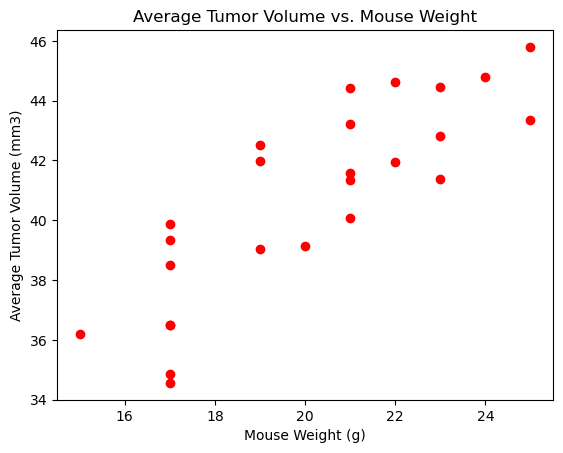

In [123]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# get data for mice treated with capomulin
capomulin_df = mouse_data_study_merged.loc[mouse_data_study_merged['Drug Regimen'] == 'Capomulin']

# calculate average tumor volume
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Calculate weight of mice
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

# Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume, color='r')

# set titles and labels
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()




## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


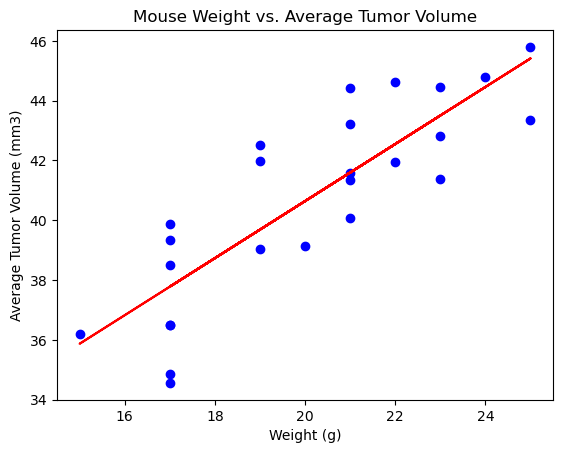

In [125]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight, average_tumor_volume)

#Print the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor_volume)

#Calculate the regression values
regress_values = mouse_weight * slope + intercept

#Create a scatter plot
plt.scatter(mouse_weight, average_tumor_volume, color="b")

#Plot the regression line
plt.plot(mouse_weight, regress_values, color="r")

#Set the title and labels
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#Show the scatter plot
plt.show()
